In [ ]:
# 2023/5/17
#
# Use simple algorithm to create landscapes with known number of attractors
# and complex (unknown) dynamical rules.

# We are limited to small networks here unless we try to do fancier sampling of states.
#

# Create network from list of transitions

In [1]:
import AttAttach.attattach as ata

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
num_nodes = 12 #7
num_attractors = 20
#landscape_structure = [[1,0.1],[1,.25],[1,.25],[1,.10],[1,.10],[1,.10],[1,.10]]
landscape_structure = [[1,1./num_attractors] for i in range(num_attractors)]
edges = ata.generate_landscape(num_nodes,landscape_structure)

In [17]:
len(edges)

4096

In [18]:
transitions = [ e[1] for e in edges ]

In [19]:
len(transitions)

4096

In [20]:
from TransitionNetwork import transitions_to_net

In [21]:
net = transitions_to_net(transitions)

# Find control kernels

In [22]:
from control_kernel_analysis import ck_analysis

In [23]:
ck_data = ck_analysis(net)

Finding attractors and control kernels...


/Users/bdaniel6/packages/Neet/neet/landscape.py:1118: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data.attractors = np.asarray(attractor_paths)


In [24]:
ck_data['attractors']

array([[ 158],
       [ 284],
       [ 411],
       [4024],
       [3449],
       [  42],
       [2161],
       [3300],
       [2373],
       [3917],
       [1058],
       [2857],
       [2062],
       [1194],
       [2644],
       [1537],
       [3765],
       [1934],
       [2112],
       [3882]])

In [25]:
np.mean(ck_data['control_kernel_sizes'])

3.7

In [26]:
np.log2(20)

4.321928094887363

# What happens if all basins but one have size one?

2023/5/30 BCD

In [8]:
from control_kernel_analysis import ck_analysis
from TransitionNetwork import transitions_to_net

In [12]:
num_nodes = 12
num_attractors = 20
s = 2**num_nodes
landscape_structure = [[1,1./s] for i in range(num_attractors-1)] + [[1,(s-num_attractors+1)/s]]
edges = ata.generate_landscape(num_nodes,landscape_structure)
transitions = [ e[1] for e in edges ]
net = transitions_to_net(transitions)

In [13]:
ck_data = ck_analysis(net)

Finding attractors and control kernels...


In [15]:
ck_data['control_kernel_sizes']

[3, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 6]

In [14]:
np.mean(ck_data['control_kernel_sizes'])

4.8

In [17]:
np.log2(num_attractors)

4.321928094887363

# 2023/6/14 Sampling over basin entropy

In [11]:
from entropy_and_basin_sizes import entropy_to_basin_sizes,min_basin_entropy,max_basin_entropy,basin_entropy

In [49]:
n = 8 #10
r = 10 #5
num_entropies = 100
print("Entropy range: {} to {}".format(min_basin_entropy(r,n),max_basin_entropy(r)))
h_tildes = np.linspace(min_basin_entropy(r,n),max_basin_entropy(r),num_entropies)
w_list = [ entropy_to_basin_sizes(h_tilde,r,n,tol=1e-2) for h_tilde in h_tildes ]
entropies = [ basin_entropy(w/2**n) for w in w_list ]

Entropy range: 0.3310675539007212 to 3.321928094887362


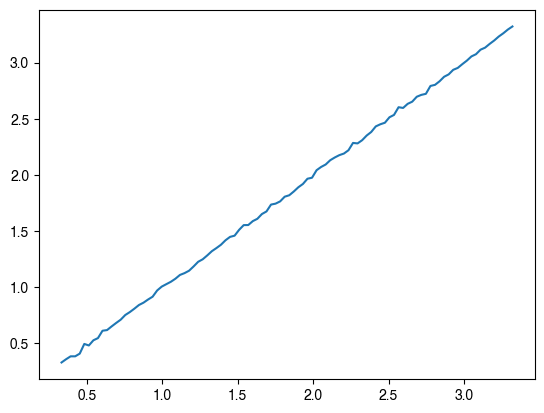

In [50]:
plt.plot(h_tildes,entropies)

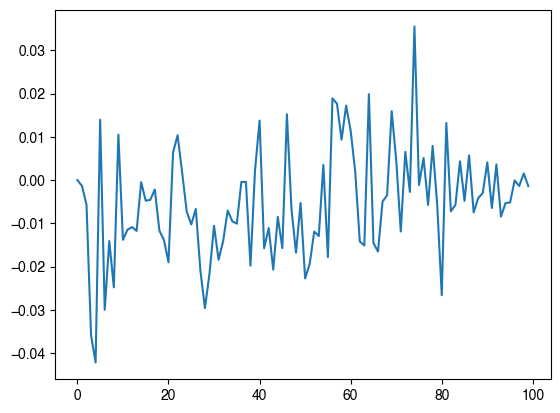

In [51]:
plt.plot(entropies-h_tildes)

In [52]:
from control_kernel_analysis import ck_analysis
from TransitionNetwork import transitions_to_net

In [53]:
ck_mean_sizes = []
for i,w in enumerate(w_list):
    print("Finding control kernels for network {} of {}".format(i,len(w_list)))
    landscape_structure = [ [1,wi/2**n] for wi in w ]
    edges = ata.generate_landscape(n,landscape_structure)
    transitions = [ e[1] for e in edges ]
    net = transitions_to_net(transitions)
    ck_data = ck_analysis(net)
    ck_mean_sizes.append(np.mean(ck_data['control_kernel_sizes']))

Finding control kernels for network 0 of 100
Finding attractors and control kernels...
Finding control kernels for network 1 of 100
Finding attractors and control kernels...


/Users/bdaniel6/packages/Neet/neet/landscape.py:1118: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data.attractors = np.asarray(attractor_paths)


Finding control kernels for network 2 of 100
Finding attractors and control kernels...
Finding control kernels for network 3 of 100
Finding attractors and control kernels...
Finding control kernels for network 4 of 100
Finding attractors and control kernels...
Finding control kernels for network 5 of 100
Finding attractors and control kernels...
Finding control kernels for network 6 of 100
Finding attractors and control kernels...
Finding control kernels for network 7 of 100
Finding attractors and control kernels...
Finding control kernels for network 8 of 100
Finding attractors and control kernels...
Finding control kernels for network 9 of 100
Finding attractors and control kernels...
Finding control kernels for network 10 of 100
Finding attractors and control kernels...
Finding control kernels for network 11 of 100
Finding attractors and control kernels...
Finding control kernels for network 12 of 100
Finding attractors and control kernels...
Finding control kernels for network 13 o

Finding control kernels for network 98 of 100
Finding attractors and control kernels...
Finding control kernels for network 99 of 100
Finding attractors and control kernels...


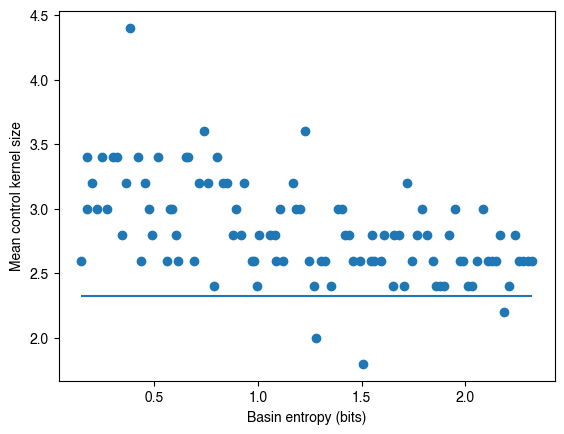

In [41]:
# n = 8, r = 5
plt.plot(entropies,ck_mean_sizes,'o')
plt.xlabel('Basin entropy (bits)')
plt.ylabel('Mean control kernel size')
plt.hlines([np.log2(r)],xmin=min(entropies),xmax=max(entropies))

In [ ]:
# n = 10, r = 5
plt.plot(entropies,ck_mean_sizes,'o')
plt.xlabel('Basin entropy (bits)')
plt.ylabel('Mean control kernel size')
plt.hlines([np.log2(r)],xmin=min(entropies),xmax=max(entropies))

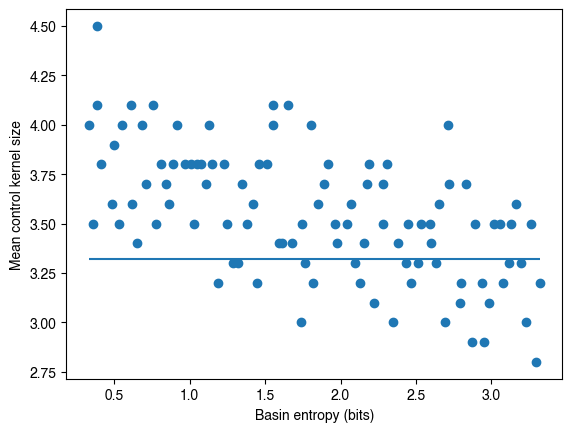

In [55]:
# n = 8, r = 10
plt.plot(entropies,ck_mean_sizes,'o')
plt.xlabel('Basin entropy (bits)')
plt.ylabel('Mean control kernel size')
plt.hlines([np.log2(r)],xmin=min(entropies),xmax=max(entropies))

In [58]:
for w in w_list[:5]:
    print(w)

[  1   1   1   1   1   1   1   1   1 247]
[  1   1   1   1   1   1   1   1   2 246]
[  1   1   1   1   1   1   1   1   3 245]
[  1   1   1   1   1   1   1   1   3 245]
[  1   1   1   1   1   1   1   1   4 244]


Text(0, 0.5, 'Mean control kernel size')

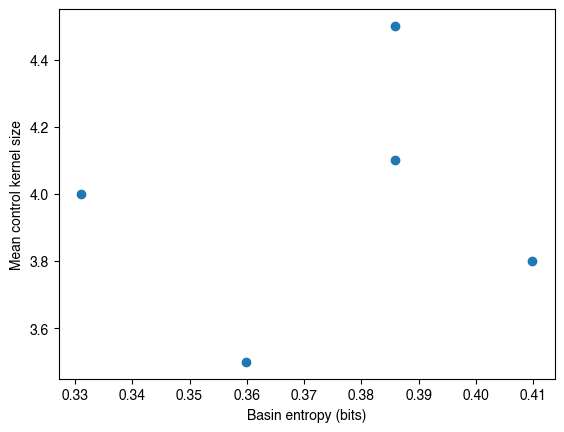

In [60]:
plt.plot(entropies[:5],ck_mean_sizes[:5],'o')
plt.xlabel('Basin entropy (bits)')
plt.ylabel('Mean control kernel size')
#plt.hlines([np.log2(r)],xmin=min(entropies),xmax=max(entropies))

Note: For each value of the entropy, there are many possible basin size distributions.  They are the solution of a system of two equations in r unknowns (so potentially an r-2 dimensional space of solutions, at least in the continuous extension of the problem).  In this plot, we are showing one possible solution for each value of the basin entropy, as provided by the scipy optimization in `entropy_to_relative_basin_sizes`.  The scattering of the control kernel sizes in this plot across $h$ might be representative of the scattering over all possible basin size distributions for a given fixed $h$.

Open questions:
    
1) For fixed $h$, what is the CK size distribution? Is the variance roughly constant for varying $h$?
2) The scaling of |CK| with $h$ looks roughly linear for these samples.  Is this more general?  Can we express the slope as some function of $r$ and $n$?
3) Is |CK| larger than $\log_2(r)$ because of the random correspondance between states and their mapping onto states of nodes?
🧐
4) Where do the extreme biased cases show up on this plot?